<a href="https://colab.research.google.com/github/malleswarigelli/DeepLearning_case-studies/blob/main/ANN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Artificial Neural Networks to predict custmoer churn**






***Build model to predict if new customer will stay or exit the bank***

*   Knowing this information help bank can offer something special for customers the model predicts would leave the bank





Churn Modelling Dataset: https://www.kaggle.com/mltuts/churn-modelling-data



# 1. Install and import basic libraries

In [1]:
# install tensorflow
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 5.9 MB 44.8 MB/s 
     |████████████████████████████████| 1.7 MB 45.5 MB/s 
     |████████████████████████████████| 438 kB 70.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [2]:
import tensorflow as tf
print(tf.__version__) # KERAS is integrated into Tesorflow verion >2.0

2.8.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Import dataset

In [4]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
print(dataset.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
dataset.shape

(10000, 14)

Details about dataset
*   contains 13 independent features and one dependent feature (Exited 1 means yes, 0 means not exited i.e staying with bank); its binary classification problem
*   RowNumber, CustromerId, Surname doesn't contribute to predict target variable, can drop them
*   Geography and Gender columns are categorical, requires to encode i.e convert to numerical values
*   NumOfProducts - how many bank products customers is having 
*   HasCrCard - 1 yes, 0 no








## 2.1 Split dataset into independent and dependent variables i.e X, y

In [6]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, -1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

3. Feature Engineering

*   convert categorical features (Geography and Gender) to numerical with dummies









In [8]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'])

# first drop Geography and Gender from X
X.drop(['Geography', 'Gender'], axis=1, inplace=True)


In [9]:
# concatenate dummies to X
X = pd.concat([X, geography, gender], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,1,0


# 3. Preprocessing data

# 3.1 Train, Test split to fit ANN model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


## 3.2 Feature scaling
 
*   Feature scaling is important for disatance based algorithms like K-Means, KNN, Linear Reg, Logistic Reg




In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_train)

(8000, 12)
[[ 0.16958176 -0.46460796  0.00666099 ...  1.74309049  1.09168714
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ... -0.57369368 -0.91601335
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.57369368  1.09168714
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.57369368 -0.91601335
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ...  1.74309049  1.09168714
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ... -0.57369368  1.09168714
  -1.09168714]]


# 4. Create ANN model

4.1 import needed libraries

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

4.2 ANN structure layout

In [13]:
# initialize ANN
classifier = Sequential()
# Add input layer
classifier.add(Dense(units=11, activation='relu'))
# Add 1st hidden layer
classifier.add(Dense(units=7, activation='relu'))
# Add 2nd hidden layer
classifier.add(Dense(units=6, activation='relu'))
# Add output layer
classifier.add(Dense(1, activation='sigmoid')) # since it's binary classification example, 1 o/p layer is enough, Activation function will be Sigmoid

In [15]:
classifier.compile(optimizer = 'adam', # adam uses default learning rate of 0.1; 
                   loss = 'binary_crossentropy', # since it's binary classification problem
                   metrics = ['accuracy'])

# if learning rate to be specified
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

## 4.2 Train ANN

In [16]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs =1000)

Epoch 1/1000
536/536 [==============================] - 6s 4ms/step - loss: 0.4894 - accuracy: 0.7962 - val_loss: 0.4526 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4335 - accuracy: 0.8125 - val_loss: 0.4319 - val_accuracy: 0.8141
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4175 - accuracy: 0.8224 - val_loss: 0.4229 - val_accuracy: 0.8186
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4074 - accuracy: 0.8306 - val_loss: 0.4151 - val_accuracy: 0.8201
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3969 - accuracy: 0.8336 - val_loss: 0.4062 - val_accuracy: 0.8239
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3847 - accuracy: 0.8406 - val_loss: 0.3946 - val_accuracy: 0.8266
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3728 - accuracy: 0.8459 - val_loss: 0.3839 - val_accuracy:

KeyboardInterrupt: ignored

In [17]:

model_history.history.keys()

NameError: ignored

### Since 1000 epochs is too much,determine ideal Epochs by applying early stopping

# 4.4 Early Stopping

In [23]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [27]:
model_history = classifier.fit(X_train, y_train, 
                               validation_split = 0.33, 
                               batch_size = 10, epochs =1000, 
                               callbacks = early_stop) # since early stopping is applied program would stop at some Epoch # when accuracy score is constant'

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3296 - accuracy: 0.8640 - val_loss: 0.3627 - val_accuracy: 0.8489
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3288 - accuracy: 0.8617 - val_loss: 0.3634 - val_accuracy: 0.8478


In [28]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 4.5 Summarize history for accuracy

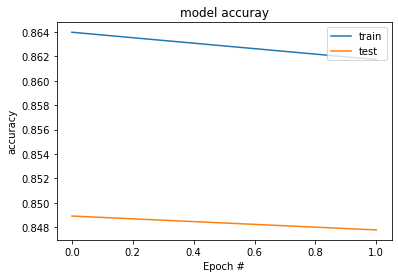

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuray')
plt.ylabel('accuracy')
plt.xlabel('Epoch #')
plt.legend(['train','test'], loc = 'upper right')
plt.show()

# 4.6 Summarize history for loss

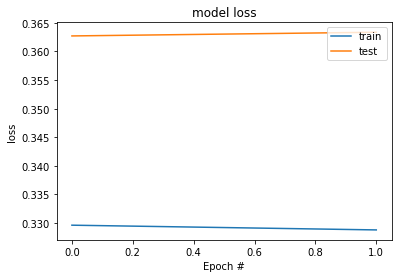

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch #')
plt.legend(['train','test'], loc = 'upper right')
plt.show()

# 5. Do predictions for test data

In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [39]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1497,   98],
       [ 187,  218]])

In [40]:
# calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8575

In [42]:
# get weights
classifier.get_weights

<bound method Model.get_weights of <keras.engine.sequential.Sequential object at 0x7f2c1edbf890>>

6. SAVE THE ANN MODEL

In [43]:
import pickle
file = open('ANN_model.pkl', 'wb')
pickle.dump(model_history, file)